# Ramen Shop Sales Analysis

##### Section:  52745

##### Group Number:  30

##### Student:  Ryan Mehendale
##### UT EID:  ram3273

##### Student:  Fidel Otero
##### UT EID:  fco229

## Introduction

### Goal

Using the sales data from a local ramen shop, we hope to uncover patterns in consumer behavior. Then, we hope to develop a cohesive visual story that allows those patterns to turn into actionable insights for the restaurant. In addition to forecasting sales, we believe that this information could help to optimize a broad range of strategic decisions, from scheduling to inventory to marketing strategies.

### Initial Setup

In [423]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [424]:
# Read the order history data
df = pd.read_csv("customers-items-export.csv", low_memory=False)

## Description of the Dataset

### Sanity Checks

In [425]:
df.shape

(22323, 33)

In [426]:
df.head()

,Establishment_Name,POS_Station,Order_Number,Order_Type,Order_Date,Customer ID,First_Name,Last_Name,Company_Name,Email,...,Class,Exchange_Void_or_Return,Return_Exchange_Reason,Discount_Amount,Discount_Reason,Gross_Item_Price,Total_Sales_Price,Total_Product_Tax,Product_Quantity,Special_Request
0,Daiboku,POS1,185341,To Go,05/11/2023 03:21:18 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.00,0.00,0.00,1.0,NaN
1,Daiboku,POS1,185342,To Go,05/11/2023 03:23:14 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.00,0.00,0.00,1.0,NaN
2,Daiboku,POS1,185342,To Go,05/11/2023 03:23:14 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.01,0.01,0.00,1.0,NaN
3,Daiboku,POS1,185342,To Go,05/11/2023 03:23:14 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,1,Void,NaN,NaN,18.00,18.00,1.49,1.0,Do not make
4,Daiboku,POS1,185369,To Go,05/11/2023 06:04:16 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.00,0.00,0.00,1.0,NaN


In [427]:
df.tail()

,Establishment_Name,POS_Station,Order_Number,Order_Type,Order_Date,Customer ID,First_Name,Last_Name,Company_Name,Email,...,Class,Exchange_Void_or_Return,Return_Exchange_Reason,Discount_Amount,Discount_Reason,Gross_Item_Price,Total_Sales_Price,Total_Product_Tax,Product_Quantity,Special_Request
22318,Daiboku,POS2,230856,Eat In,10/31/2023 08:00:39 PM,NaN,NaN,NaN,NaN,NaN,...,Ramen,0,NaN,NaN,NaN,10.0,10.0,0.82,1.0,TOGO
22319,Daiboku,POS1,230885,To Go,10/31/2023 08:45:12 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.0,0.0,0.00,1.0,NaN
22320,Daiboku,POS1,230885,To Go,10/31/2023 08:45:12 PM,NaN,NaN,NaN,NaN,NaN,...,Ramen,0,NaN,NaN,NaN,16.0,10.0,1.32,1.0,NaN
22321,Daiboku,POS1,230885,To Go,10/31/2023 08:45:12 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0.5,0.5,0.04,1.0,NaN
22322,Daiboku,POS1,230885,To Go,10/31/2023 08:45:12 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,1.0,1.0,0.08,1.0,NaN


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22323 entries, 0 to 22322
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Establishment_Name       22323 non-null  object 
 1   POS_Station              22323 non-null  object 
 2   Order_Number             22323 non-null  int64  
 3   Order_Type               22323 non-null  object 
 4   Order_Date               22323 non-null  object 
 5   Customer ID              909 non-null    float64
 6   First_Name               909 non-null    object 
 7   Last_Name                909 non-null    object 
 8   Company_Name             0 non-null      float64
 9   Email                    909 non-null    object 
 10  Reference_ID             1 non-null      object 
 11  Order_Sub_Total          22323 non-null  float64
 12  Order_Sales_Tax          22323 non-null  float64
 13  Order_Total              22323 non-null  float64
 14  Payment_Amount        

In [429]:
df.describe()

,Order_Number,Customer ID,Company_Name,Order_Sub_Total,Order_Sales_Tax,Order_Total,Payment_Amount,Barcode,Sku,Cost,Product_Price,Exchange_Void_or_Return,Discount_Amount,Gross_Item_Price,Total_Sales_Price,Total_Product_Tax,Product_Quantity
count,22323.000000,909.000000,0.0,22323.000000,22323.000000,22323.000000,22323.000000,2.225000e+04,2.000000e+01,22323.0,22323.000000,22323.000000,841.000000,22323.000000,22323.000000,22323.000000,22323.000000
mean,210074.469471,109215.795380,NaN,37.054772,2.968230,38.779181,38.683698,1.000980e+11,1.000000e+11,0.0,10.040451,0.035434,3.243936,10.427585,10.554211,0.884989,1.068808
std,12096.632548,18576.333315,NaN,29.548151,2.430112,31.725330,31.773770,1.077442e+10,3.959747e+02,0.0,7.912007,0.184879,2.914323,8.175517,8.551853,0.732687,0.336416
min,185341.000000,1124.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000e+10,1.000000e+11,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,200156.000000,112447.000000,NaN,18.000000,1.400000,17.940000,17.860000,1.000000e+11,1.000000e+11,0.0,4.000000,0.000000,1.000000,4.000000,4.500000,0.330000,1.000000
50%,209675.000000,114530.000000,NaN,32.000000,2.600000,33.560000,33.560000,1.000000e+11,1.000000e+11,0.0,10.000000,0.000000,2.000000,10.000000,10.000000,0.820000,1.000000
75%,220213.500000,115344.000000,NaN,48.000000,3.880000,50.340000,50.340000,1.000000e+11,1.000000e+11,0.0,14.500000,0.000000,5.000000,16.500000,14.500000,1.360000,1.000000
max,230885.000000,115902.000000,NaN,759.000000,62.620000,821.620000,821.620000,1.234671e+12,1.000000e+11,0.0,759.000000,1.000000,27.000000,759.000000,759.000000,62.620000,10.000000


### Drop Unnecessary Columns

The following columns were determined to be unnecessary:

* `Establishment_Name` (only dealing with one restaurant, whose name is removed for privacy reasons)
* `POS_Station` (not interested in which payment terminal is used)
* `Customer ID` (not tracked in dataset, fully null)
* `First_Name` (removed for privacy reasons)
* `Last_Name` (removed for privacy reasons)
* `Company_Name` (not tracked in dataset, fully null)
* `E-mail` (removed for privacy reasons)
* `Reference_ID` (mostly not tracked in dataset, nearly fully null)
* `Payment_Amount` (redundant with `Order_Total`)
* `Barcode` (products better tracked by `Product_Name`)
* `Sku` (nearly fully null, better tracked by `Product_Name`)
* `Cost` (not truly tracked in dataset, all zero values)
* `Product_Price` (better tracked by `Gross_Item_Price` and `Total_Sales_Price`)
* `Sub_category` (redundant with `Category` in this dataset)
* `Class` (doesn't provide useful information beyond `Category`)


In [430]:
df.drop(
    columns=[
        "Establishment_Name",
        "POS_Station",
        "Customer ID",
        "First_Name",
        "Last_Name",
        "Company_Name",
        "Email",
        "Reference_ID",
        "Payment_Amount",
        "Barcode",
        "Sku",
        "Cost",
        "Product_Price",
        "Sub_category",
        "Class",
        "Return_Exchange_Reason",
        "Discount_Amount",
    ],
    inplace=True,
)

In [431]:
df.columns

Index(['Order_Number', 'Order_Type', 'Order_Date', 'Order_Sub_Total',
       'Order_Sales_Tax', 'Order_Total', 'Payment_Type', 'Product_Name',
       'Category', 'Exchange_Void_or_Return', 'Discount_Reason',
       'Gross_Item_Price', 'Total_Sales_Price', 'Total_Product_Tax',
       'Product_Quantity', 'Special_Request'],
      dtype='object')

### Define Column Types

##### Datetime

In [432]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

/var/folders/2l/5z_t54nn2mgcnb_rlc4qxcr40000gn/T/ipykernel_792/3641458714.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



##### Categorical

In [433]:
df[["Order_Number", "Order_Type", "Payment_Type", "Product_Name", "Category"]] = df[
    ["Order_Number", "Order_Type", "Payment_Type", "Product_Name", "Category"]
].astype("category")

##### Boolean

In [434]:
df["Exchange_Void_or_Return"] = df["Exchange_Void_or_Return"].astype(bool)

##### Numeric


`Product_Quantity` is a discrete integer, and all other numerical columns represent dollar values, which are discrete in the sense that they are measured to pennies.

In [435]:
df["Product_Quantity"] = df["Product_Quantity"].astype(int)

#### Check column types

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22323 entries, 0 to 22322
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order_Number             22323 non-null  category      
 1   Order_Type               22323 non-null  category      
 2   Order_Date               22323 non-null  datetime64[ns]
 3   Order_Sub_Total          22323 non-null  float64       
 4   Order_Sales_Tax          22323 non-null  float64       
 5   Order_Total              22323 non-null  float64       
 6   Payment_Type             21336 non-null  category      
 7   Product_Name             22323 non-null  category      
 8   Category                 22250 non-null  category      
 9   Exchange_Void_or_Return  22323 non-null  bool          
 10  Discount_Reason          780 non-null    object        
 11  Gross_Item_Price         22323 non-null  float64       
 12  Total_Sales_Price        22323 n

### Descriptive Statistics

#### Categorical Columns

In [437]:
df[
    ["Order_Number", "Order_Type", "Payment_Type", "Product_Name", "Category"]
].describe()

,Order_Number,Order_Type,Payment_Type,Product_Name,Category
count,22323,22323,21336,22323,22250
unique,8829,5,10,269,13
top,228348,To Go,Credit,Shoyu,Food
freq,30,11035,19290,3247,13964


#### Quantitative Data

In [438]:
print("All values in $ (USD)")
df[
    [
        "Order_Sub_Total",
        "Order_Sales_Tax",
        "Order_Total",
        "Gross_Item_Price",
        "Total_Sales_Price",
        "Total_Product_Tax",
        "Product_Quantity",
    ]
].describe()

All values in $ (USD)


,Order_Sub_Total,Order_Sales_Tax,Order_Total,Gross_Item_Price,Total_Sales_Price,Total_Product_Tax,Product_Quantity
count,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000
mean,37.054772,2.968230,38.779181,10.427585,10.554211,0.884989,1.068808
std,29.548151,2.430112,31.725330,8.175517,8.551853,0.732687,0.336416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,18.000000,1.400000,17.940000,4.000000,4.500000,0.330000,1.000000
50%,32.000000,2.600000,33.560000,10.000000,10.000000,0.820000,1.000000
75%,48.000000,3.880000,50.340000,16.500000,14.500000,1.360000,1.000000
max,759.000000,62.620000,821.620000,759.000000,759.000000,62.620000,10.000000


### Data Wrangling

#### Missing Values

First, we find all missing data

In [439]:
df.isna().sum()

Order_Number                   0
Order_Type                     0
Order_Date                     0
Order_Sub_Total                0
Order_Sales_Tax                0
Order_Total                    0
Payment_Type                 987
Product_Name                   0
Category                      73
Exchange_Void_or_Return        0
Discount_Reason            21543
Gross_Item_Price               0
Total_Sales_Price              0
Total_Product_Tax              0
Product_Quantity               0
Special_Request            21544
dtype: int64

We see that `Discount_Reason`, `Special_Request` have a lot of null values, but those are expected. They occur when there is no discount or request, or when the server chose not to add a note.  
No action needs to be taken.

`Category` has a few null values, but they are also expected. They occur when an item did not have a category at the time.  
For now, no action needs to be taken, but deeper exploration might allow us to retroactively categorize them.

`Payment_Type` has meaningful missing data, so we will investigate further.

##### `Payment_Type`

Whenever payment type  is NaN, this means that the customer did not pay out. Thus we cannot count this as a sale. We can verify this information seeing 'Exchange_Void_or_Return' for the Order_Totals that have a value greater than 0. If payment type is NaN and Order_Total is 0.00, there is no need to Void or Return. 



Whenever `Payment_Type` is null, it means that the customer did not pay out.

Our knowledge of the data means that there are three possibilities
* `Payment_Type` is null, `Order_Total` is non- zero, `Exchange_Void_or_Return` is true
    * There was no payment because the order was returned.
* `Payment_Type` is null, `Order_Total` is zero, `Exchange_Void_or_Return` is true
    * There was no payment because the order was voided.
* `Payment_Type` is null, `Order_Total` is zero, `Exchange_Void_or_Return` is false 
    * There was no payment because the order was complimentary.

We can remove the null values by updating `Payment_Type` with this information.

In [440]:
df["Payment_Type"] = df["Payment_Type"].cat.add_categories(
    ["Returned", "Void", "Complimentary"]
)

In [441]:
df.loc[
    (df["Payment_Type"].isna())
    & (df["Order_Total"] != 0.00)
    & (df["Exchange_Void_or_Return"]),
    "Payment_Type",
] = "Returned"

In [442]:
df.loc[
    (df["Payment_Type"].isna())
    & (df["Order_Total"] == 0.00)
    & (df["Exchange_Void_or_Return"]),
    "Payment_Type",
] = "Void"

In [443]:
df.loc[
    (df["Payment_Type"].isna())
    & (df["Order_Total"] == 0.00)
    & ~(df["Exchange_Void_or_Return"]),
    "Payment_Type",
] = "Complimentary"

And, we can check to make sure the operations completed successfully

In [444]:
df["Payment_Type"].value_counts()

Payment_Type
Credit                19290
Cash                    740
Uber Eats               658
Complimentary           595
Door Dash               516
Void                    337
Cash;Credit              75
Returned                 55
Grub Hub                 42
Credit;Gift Cards         7
Gift Cards                4
Trade                     3
Open Table Omakase        1
Name: count, dtype: int64

In [445]:
df["Payment_Type"].isna().sum()

0

#### Additional Data Wrangling

Examination of the data shows that there are no values outside of expected ranges.

In [446]:
df.describe()

,Order_Date,Order_Sub_Total,Order_Sales_Tax,Order_Total,Gross_Item_Price,Total_Sales_Price,Total_Product_Tax,Product_Quantity
count,22323,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000,22323.000000
mean,2023-08-16 23:44:33.383729920,37.054772,2.968230,38.779181,10.427585,10.554211,0.884989,1.068808
min,2023-05-11 15:21:18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2023-07-10 18:08:49,18.000000,1.400000,17.940000,4.000000,4.500000,0.330000,1.000000
50%,2023-08-15 20:32:59,32.000000,2.600000,33.560000,10.000000,10.000000,0.820000,1.000000
75%,2023-09-24 12:09:00.500000,48.000000,3.880000,50.340000,16.500000,14.500000,1.360000,1.000000
max,2023-10-31 20:45:12,759.000000,62.620000,821.620000,759.000000,759.000000,62.620000,10.000000
std,NaN,29.548151,2.430112,31.725330,8.175517,8.551853,0.732687,0.336416


There is no reason to remove duplicates from any of the columns of this dataset.

## Statistical Analysis

### Correlation

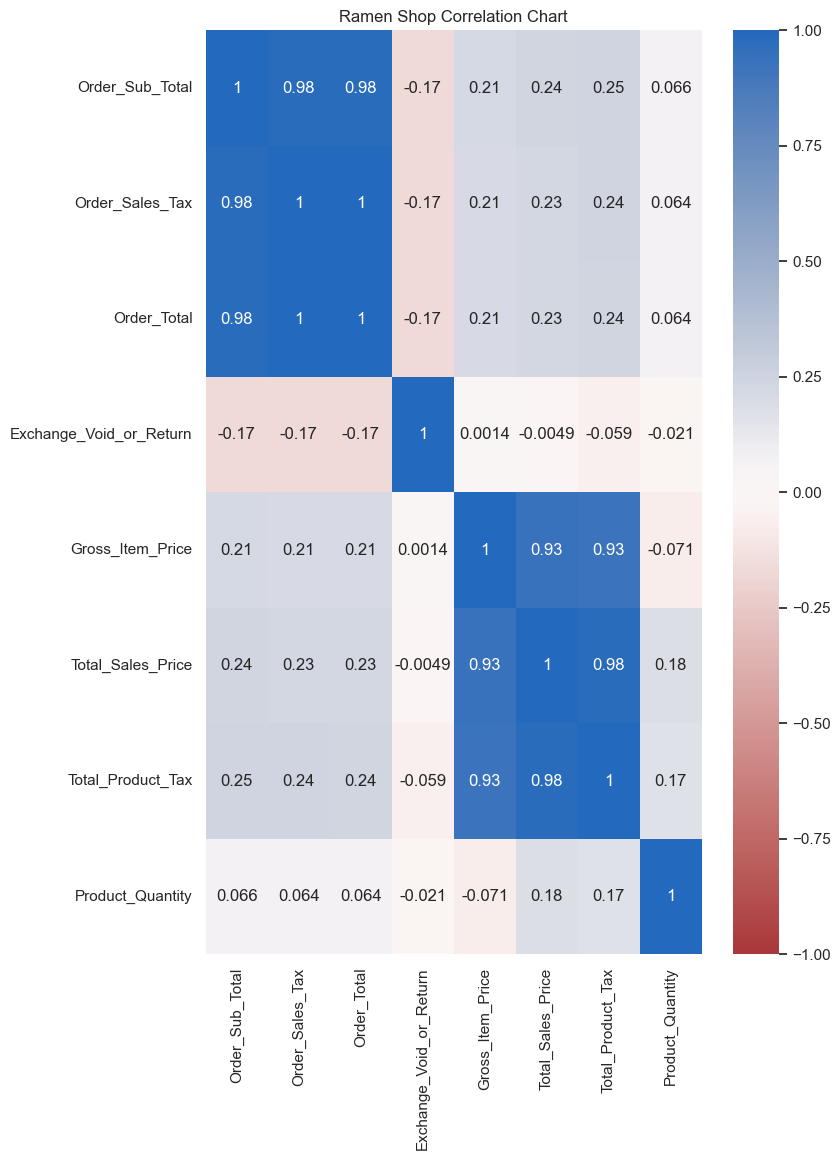

In [447]:
plt.figure(figsize=(8, 12))
sns.heatmap(
    df.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="vlag_r",
)
plt.title("Ramen Shop Correlation Chart")
plt.yticks(rotation=0)

plt.show()

For this dataset, the only values with high correlations are ones that are intuitively obvious: The list prices, tax, and total for both orders and products.  


We don't need to do any additional analysis to determine the fit between these variables, they are related through an obvious linear relationship.

# Design

##### Previously in the analysis portion we introduced the sales data from a local ramen shop. To reiterate, we hope to uncover patterns in consumer behavior. Then, we hope to develop a cohesive visual story that allows those patterns to turn into actionable insights for the restaurant. In addition to forecasting sales, we believe that this information could help to optimize a broad range of strategic decisions, from scheduling to inventory to marketing strategies.

##### Features
The features that we are interested in are:

* `Order_Number` 
* `Order_Type`
* `Order_Date`
* `Order_Sub_Total`
* `Order_Sales_Tax`
* `Order_Total`
* `Payment_Type`
* `Product_Name`
* `Category`
* `Exchange_Void_or_Return`
* `Discount_Reason`
* `Gross_Item_Price`
* `Total_Sales_Price`
* `Total_Product_Tax`
* `Product_Quantity`
* `Special_Request` 

## Understanding Customer Preferences

### Product Sales Distribution Over Time

Let's take a look at how the ramen sales have changed over time

In [448]:
df['Product_Name'].replace({'(V) Shoyu': 'Shoyu', 'Chicken Shoyu': 'Shoyu',
                            'Spicy Miso': 'Spicy'})
products = df[['Order_Number', 'Order_Date', 'Product_Name', 'Product_Quantity']]
products = products.set_index('Order_Date')

In [449]:
products

,Order_Number,Product_Name,Product_Quantity
Order_Date,,,
2023-05-11 15:21:18,185341,Smoked Karage,1
2023-05-11 15:23:14,185342,Smoked Karage,1
2023-05-11 15:23:14,185342,LOVE,1
2023-05-11 15:23:14,185342,10 Indomitable Chicken Wing ICW,1
2023-05-11 18:04:16,185369,Smoked Karage,1
...,...,...,...
2023-10-31 20:00:39,230856,Classic Shoyu,1
2023-10-31 20:45:12,230885,TO-GO,1
2023-10-31 20:45:12,230885,Classic Shoyu,1


In [450]:
products_1 = products.reset_index().groupby(['Order_Date', 'Product_Name'])['Product_Quantity'].aggregate('first').unstack()
products

/var/folders/2l/5z_t54nn2mgcnb_rlc4qxcr40000gn/T/ipykernel_792/1700261227.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Order_Number,Product_Name,Product_Quantity
Order_Date,,,
2023-05-11 15:21:18,185341,Smoked Karage,1
2023-05-11 15:23:14,185342,Smoked Karage,1
2023-05-11 15:23:14,185342,LOVE,1
2023-05-11 15:23:14,185342,10 Indomitable Chicken Wing ICW,1
2023-05-11 18:04:16,185369,Smoked Karage,1
...,...,...,...
2023-10-31 20:00:39,230856,Classic Shoyu,1
2023-10-31 20:45:12,230885,TO-GO,1
2023-10-31 20:45:12,230885,Classic Shoyu,1


In [451]:
months = products_1.resample('M').sum()

months.index = months.index.strftime("%b")

The interactive chart below represents the product mix each month, and if you click on a particular month you can see the monthly totals. Originally, we were going to display a weekly view, however we believe that a monthly view is more informative and captures the bigger picture. Here, we can clearly see that the restaurant sold the most ramen in August. 

In [452]:
interval = alt.selection_point(fields=['Order_Date'], empty=False)

product_mix = alt.Chart(months.reset_index().melt('Order_Date'),title=alt.Title('Product Mix Each Month',subtitle=['All products'])).mark_bar(size=20).encode(
    alt.X('Order_Date').scale(domain=('May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct')).title('Month'),
    alt.Y('value').title('Number Ordered'),
    color='Product_Name',
    tooltip=['Product_Name', 'value']
).add_params(
    interval
).properties(width=600, 
             height=400)

each_product = alt.Chart(months.reset_index().melt('Order_Date')).mark_bar(size=5).encode(
    alt.Y('Product_Name').title('Product'),
    alt.X('value').title('Number Ordered')
).properties(
    width=600,
    height=1700,
    title='Totals for Each Product'
).transform_filter(
    interval
)

product_mix & each_product

alt.VConcatChart(...)

This graph provides a broad overview of each product and how much of it was sold each month. Although the graphic provides a lot of detail, it is highly general. Our product of interest is ramen. Thus, we will narrow the graphic down to only include ramen products.

In [453]:
ramen = products_1[['Shoyu', 'Spicy', 'Classic Shoyu', 'Jiro', 'Shoyu Jr']]
months = ramen.resample('M').sum()

months.index = months.index.strftime("%b")
months.reset_index().melt('Order_Date')

,Order_Date,Product_Name,value
0,May,Shoyu,150.0
1,Jun,Shoyu,590.0
2,Jul,Shoyu,751.0
3,Aug,Shoyu,513.0
4,Sep,Shoyu,471.0
5,Oct,Shoyu,589.0
6,May,Spicy,128.0
7,Jun,Spicy,419.0
8,Jul,Spicy,644.0
9,Aug,Spicy,562.0


In [454]:
interval = alt.selection_point(fields=['Order_Date'], empty=False)

product_mix = alt.Chart(months.reset_index().melt('Order_Date'),title=alt.Title('Product Mix Each Month',subtitle=['Ramen'])).mark_bar(size=20).encode(
    alt.X('Order_Date').scale(domain=('May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct')).title('Month'),
    alt.Y('value').title('Number Ordered'),
    color='Product_Name',
    tooltip=['Product_Name', 'value']
).add_params(
    interval
).properties(width=600, 
             height=400)

each_product = alt.Chart(months.reset_index().melt('Order_Date')).mark_bar(size=5).encode(
    alt.Y('Product_Name').title('Product'),
    alt.X('value').title('Number Ordered')
).properties(
    width=600,
    height=200,
    title='Totals for Each Product'
).transform_filter(
    interval
)

product_mix & each_product

alt.VConcatChart(...)

## Product Placement Optimization

Instead of using a Matplotlib/Seaborn pie chart, we found that using plotly is much better and more interactive. The pie chart below showcases the total distribution of sales for each product since opening. 

In [455]:
products.drop(columns='Order_Number', inplace=True)
products = products.groupby('Product_Name').sum().reset_index()

/var/folders/2l/5z_t54nn2mgcnb_rlc4qxcr40000gn/T/ipykernel_792/3790618416.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [456]:
fig = px.pie(products, values='Product_Quantity', names='Product_Name', title='Total Product Sales', 
             hover_data='Product_Quantity', labels={'Product_Quantity': 'Total amount sold ', 'Product_Name': 'Product '})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [457]:
total_ramens = months.cumsum()
totals = total_ramens.loc[['Oct'], :]

totals = totals.melt()

fig = px.pie(totals, values='value', names='Product_Name', title='Total Ramen Sales', 
             hover_data='value', labels={'value': 'Total amount sold ', 'Product_Name': 'Product '})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

To provide context, the Smoked Chicken Shoyu and the Spicy Miso are at the top of the ramen section of the menu, where as the Jiro and the Classic are both below them. If the goal of the restaurant was to increase the amount of Jiro sales, we would place the Jiro above the Spicy Miso. If we wanted to increase the sales of the Classic Shoyu, we would place the Classic Shoyu above the Smoked Chicken Shoyu.

## Forecasting Sales Data

### Auto ARIMA using daily sampling

Now, we can try to forecast sales by building an ARIMA model using Auto ARIMA. Since originally the time-series was not stationary, we have to make it stationary by taking the difference.

In [487]:
days['day'] = days.index
days_test = days.fillna(0)
days_test = days.diff()
days_test = days.fillna(0)
from statsmodels.tsa.stattools import adfuller

adft = adfuller (days.drop(columns='day'), autolag = 'AIC')
output_df = pd.DataFrame({'Values': [adft[0], adft[1], adft[2], adft[3],
                                    adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                         'Metric': ['Test Statistics', 'p-value', 'No. of lags used',
                                   'Number of observations used', 'critical value (1%)',
                                   'critical value (5%)', 'critical value (10%)']
                         
                         })
print (output_df)

train = days[days['day'] < pd.to_datetime ('2023-10-01', format = '%Y-%m-%d')]
test = days[days['day'] >= pd.to_datetime ('2023-10-01', format = '%Y-%m-%d')]

del train['day']
del test['day']

         Values                       Metric
0 -1.288149e+01              Test Statistics
1  4.648708e-24                      p-value
2  1.400000e+01             No. of lags used
3  1.590000e+02  Number of observations used
4 -3.472161e+00          critical value (1%)
5 -2.879895e+00          critical value (5%)
6 -2.576557e+00         critical value (10%)


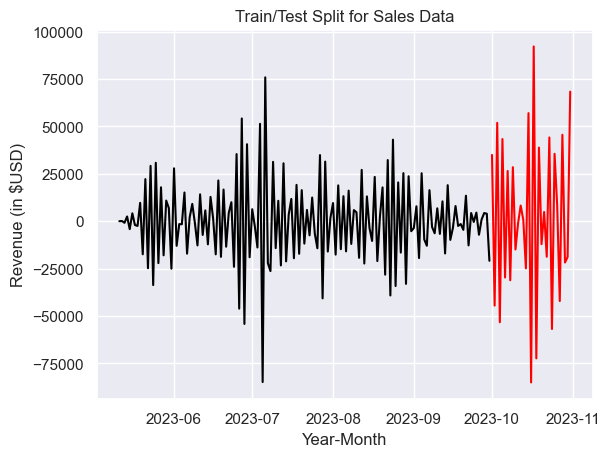

In [488]:
plt.plot (train, color = 'black')
plt.plot (test, color = 'red')
plt.title ('Train/Test Split for Sales Data')
plt.ylabel ('Revenue (in $USD)')
plt.xlabel ('Year-Month')
sns.set()
plt.show()

In [489]:
from pmdarima.arima import auto_arima

model = auto_arima (train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit (train)

forecast = model.predict (n_periods = len(test))
forecast = pd.DataFrame (forecast, index = test.index, columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3264.512, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3089.099, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3262.516, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2984.402, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2923.335, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2786.603, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2741.517, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2678.641, Time=0.34 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2712.665, Time=0.20 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=2630.096, Time=0.36 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2629.417, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2751.099, Time=0.34 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=i

In [490]:
# calculate the root mean squared error (RMSE)
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt (mean_squared_error (test, forecast))
print ('RMSE: ', rms)

RMSE:  40875.2285399732


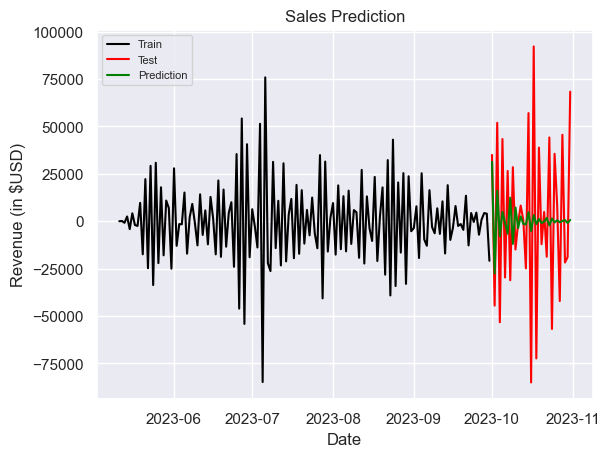

In [491]:
# visualize the two sets
plt.plot (train, label = 'Train', color = 'black')
plt.plot (test, label = 'Test', color = 'red')
plt.plot (forecast, label = 'Prediction', color = 'green')
plt.title ('Sales Prediction')
plt.ylabel ('Revenue (in $USD)')
plt.xlabel ('Date')
plt.legend (loc = 'upper left', fontsize = 8)
plt.show()

### Auto ARIMA with weekly sampling

In [492]:
days.drop(columns='day', inplace=True)

Just like before, 

In [493]:
weeks = days.resample('W').sum()
weeks['week'] = weeks.index

adft = adfuller (weeks.drop(columns='week'), autolag = 'AIC')
output_df = pd.DataFrame({'Values': [adft[0], adft[1], adft[2], adft[3],
                                    adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                         'Metric': ['Test Statistics', 'p-value', 'No. of lags used',
                                   'Number of observations used', 'critical value (1%)',
                                   'critical value (5%)', 'critical value (10%)']
                         
                         })
print (output_df)

train = weeks[weeks['week'] < pd.to_datetime('2023-10-01', format='%Y-%m-%d')]
test = weeks[weeks['week'] >= pd.to_datetime('2023-10-01', format='%Y-%m-%d')]

del train['week']
del test['week']


         Values                       Metric
0 -7.798787e+00              Test Statistics
1  7.591000e-12                      p-value
2  1.000000e+00             No. of lags used
3  2.400000e+01  Number of observations used
4 -3.737709e+00          critical value (1%)
5 -2.992216e+00          critical value (5%)
6 -2.635747e+00         critical value (10%)


In [465]:
from pmdarima.arima import auto_arima

model = auto_arima (train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit (train)

forecast = model.predict (n_periods = len(test))
forecast = pd.DataFrame (forecast, index = test.index, columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=396.656, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=387.861, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=391.083, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=428.024, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=389.255, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=390.447, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=386.458, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=388.174, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=388.438, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=412.022, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.491 seconds


In [466]:
# calculate the root mean squared error (RMSE)
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt (mean_squared_error (test, forecast))
print ('RMSE: ', rms)

RMSE:  5963.435571571495


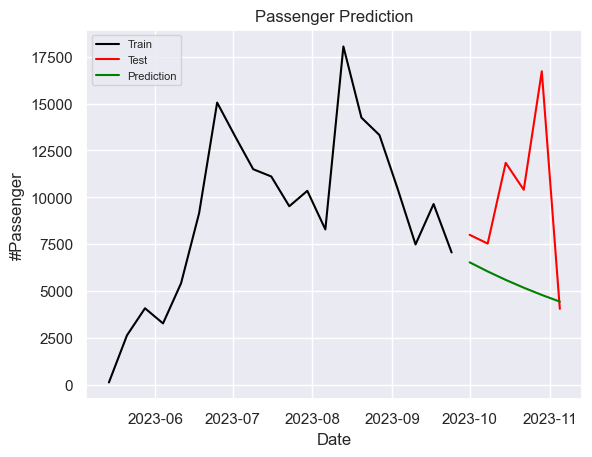

In [467]:
# visualize the two sets
plt.plot (train, label = 'Train', color = 'black')
plt.plot (test, label = 'Test', color = 'red')
plt.plot (forecast, label = 'Prediction', color = 'green')
plt.title ('Passenger Prediction')
plt.ylabel ('#Passenger')
plt.xlabel ('Date')
plt.legend (loc = 'upper left', fontsize = 8)
plt.show()

As you can see, when we resample to weeks, the RMSE is not as good at predicting revenues compared to the daily sample. Thus, the ARIMA parameters for the daily sample would be a better predictor of sales. 

## Improve Operational Efficiency in Scheduling

In [ ]:
# WIP My apologies.

## Uncovering Financial Insights

To uncover patterns in consumer behavior lets get an overall visual of the data. Then we will look at ramen sales over time for each different ramen sold. To start, we can take a look at daily sales over time

In [468]:
days = df.drop_duplicates(subset='Order_Number')
days = days[['Order_Date', 'Order_Total']]
days = days.set_index('Order_Date')
days = days.resample('D').sum()

In [469]:
weeks = days.resample('w').mean()

### Daily Sales Over Time

The chart below visualizes daily sales over time. The points represent the total revenue for a single day, and the blue line represents average weekly sales. Sales appear to be stochastic, however there are several intervals in the chart that can be loosely explained. At opening, sales were at the lowest and after marketing efforts sales went up drastically. However, we can see a dip from the end of June up until the start of August that can be partially explained by various factors such as the extreme heat and inefficient marketing. We can see that August experienced the highest density of days with revenues above 1000. This can be explained by school starting again, especially because of the fact that the restaurant is right next to campus. After the start of classes, we see a dip in sales yet again until the weather started to become colder towards the middle of October and the restaurant experienced higher volumes of sales. 

In [470]:
import altair as alt

chart_1 = alt.Chart(days.reset_index().melt('Order_Date')).mark_circle(size=10, opacity=0.5).encode(
    x='Order_Date',
    y='value',
    color = 'variable'
).properties(width=800, height=400)

chart_2 = alt.Chart(weeks.reset_index().melt('Order_Date')).mark_line(interpolate="basis", opacity=1).encode(
    x='Order_Date',
    y='value',
    color = 'variable'
)

(chart_1 + chart_2).interactive().encode(
    alt.X(title='Order Date'),
    alt.Y(title='Order Total in $USD')
)

alt.LayerChart(...)

The chart below visualizes cumulative sales over time. At the beginning, growth appears to be exponential up until the beginning of July. From there it appears growth is rather linear, with a slight increase in the growth 

In [471]:
days_cum = days.cumsum()
chart_3 = alt.Chart(days_cum.reset_index().melt('Order_Date')).mark_circle(size=10, opacity=0.5).encode(
    x='Order_Date',
    y='value',
    color = 'variable'
).properties(width=800, height=400)

chart_3.interactive()

alt.Chart(...)